In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import svm
plt.style.use('ggplot')

In [72]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif 

Reading data

In [34]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\DT\\Micro Credit Project\\data file.csv")

In [35]:
data.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


#Data Exploration

In [36]:
data=data.drop(data.columns[0], axis=1)
data=data.drop(data.columns[34], axis=1)
data["pdate"] = pd.to_datetime(data["pdate"])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

In [38]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

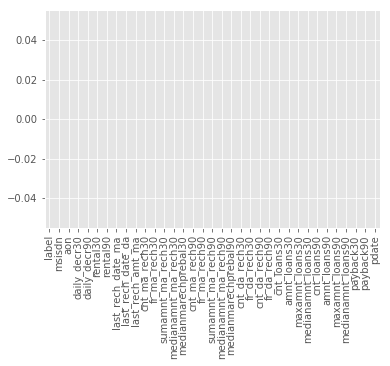

In [39]:
data.isna().sum().plot(kind="bar")
data.isnull().sum()

In [40]:
data.tail(10)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
209583,1,30201I82732,935.0,15.550667,15.550667,140.44,140.44,4.0,0.0,1547,...,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,2016-06-02
209584,0,70387I89237,945.0,0.000000,0.000000,78.30,78.30,0.0,0.0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,2016-06-06
209585,1,12227I90843,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,2309,...,30,6.0,0.0,5.0,30,6,0.0,5.2,5.200000,2016-07-04
209586,1,60331I70370,254.0,20079.157333,20228.090000,4003.12,5173.74,2.0,0.0,1539,...,66,12.0,0.0,15.0,120,12,0.0,3.0,2.400000,2016-07-22
209587,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,3178,...,12,12.0,1.0,3.0,24,12,1.0,0.0,30.000000,2016-08-02
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,2016-07-25
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,...,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,2016-07-07


In [41]:
len(pd.unique(data["msisdn"]))

186243

In [42]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [43]:
data.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [44]:
col_names=data.columns
col_names

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

In [45]:
data['label'].value_counts()[0]/len(data['label'])

0.12482287099282896

In [46]:
data['label'].value_counts()[1]/len(data['label'])

0.875177129007171

#Data is skewed with the ration of 12.5/87.5

In [47]:
#relation between average loan amount and loan status
data[['amnt_loans90','label']].groupby(by='label').mean()

#Loan defaulters tend to apply for larger loans.

,amnt_loans90
label,
0,9.642382
1,25.642590


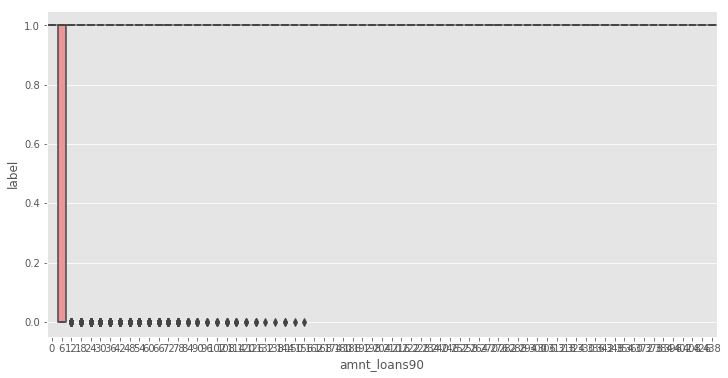

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(data['amnt_loans90'],data['label'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b03c575908>,
 'caps': [<matplotlib.lines.Line2D at 0x1b03c589208>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b03c5757b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b03c589a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b03c589e80>],
 'means': []}

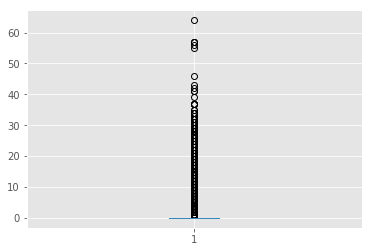

In [49]:
fig,ax=plt.subplots()
ax.boxplot(data["fr_da_rech90"])

In [50]:
data["fr_da_rech90"].min()

0

data cleaning

In [51]:
print(sum(data['label']==1))
print(sum(data['label']==0))
len(data.index)

183431
26162


209593

data visualization

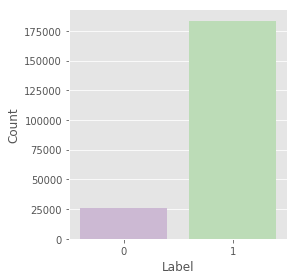

In [52]:
g=sns.factorplot(x="label",data=data,kind="count",palette="PRGn",alpha=1)
g.set(xlabel="Label",ylabel="Count")
plt.show()

Feature Selection (Logistic Regression)

In [124]:
Xsel=data.iloc[:,2:40]
Ysel=data.iloc[:,0]

In [125]:
fit=SelectKBest(score_func=chi2,k="all")

In [126]:
fit=bestfeatures.fit(Xsel,Ysel)

TypeError: invalid type promotion